$\textbf{Beispielgraphen mit Eigenvektoren} \\$ 
Im Folgenden betrachten wir zwei einfache Beispiele für Graphen mit entsprechenden Eigenvektoren, die wir mit der Bibliothek networkx erzeugen. Zur Erinnerung ein Graph $G=(V,E)$ ist ein Tupel bestehend aus einer Knotenmenge $V$ und einer Kantenmenge $E$, die angibt, welche Knoten miteinander verbunden sind. Die Graphen, die wir hier betrachten, sind ungewichtet.

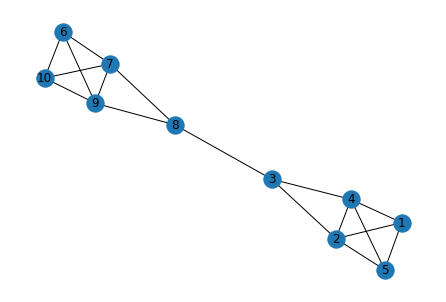

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib


G_1 = nx.Graph()

#Knotenmenge
V_1 = np.array([1,2,3,4,5,6,7,8,9,10]) 
G_1.add_nodes_from(V_1)

#Kantenmenge
E_1 = [(1,2),(4,3),(3,2),(2,5),(5,1), (2,4),(4,5), (1,4), (6,7), (7,8), (8,9), (9,10), 
                    (10,6), (7,10), (6,9), (9,7), (8,3)] #
G_1.add_edges_from(E_1)

#Feste Positionen der Knoten für den Graphen, damit dieser beim plotten immer gleich aussieht
pos_G = nx.spring_layout(G_1, seed=8)
    

nx.draw(G_1,pos = pos_G, with_labels = True)



Wir sehen, dass der Graph aus zwei 'Häusern des Nikolaus' besteht, die über die Spitze miteinander verbunden sind.

Eine natürliche Art einen Graphen darzustellen ist über seine Adjazenzmatrix $A$, die durch 
\begin{align*}
A_{ij} = \begin{cases}
     1 & \text{für } \{v_i,v_j\} \in E \\
     0 & \text{sonst}
     \end{cases}
\end{align*}
definiert ist. Die Adjazenzmatrix erhalten wir durch folgenden Befehl:

In [3]:
A = nx.to_numpy_array(G_1)
print(A)

[[0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
 [1. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 1. 0. 0. 0. 1. 0. 0.]
 [1. 1. 1. 0. 1. 0. 0. 0. 0. 0.]
 [1. 1. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 1. 1.]
 [0. 0. 0. 0. 0. 1. 0. 1. 1. 1.]
 [0. 0. 1. 0. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 0. 1.]
 [0. 0. 0. 0. 0. 1. 1. 0. 1. 0.]]


Aus der Adjazenzmatrix wollen wir nun die normalisierte Laplace-Matrix $L_{rw} = I_d - D^{-1}W$ berechnen. Dazu berechnen wir zurnächst die Gradmatrix $D= diag(d_1,...,d_n)$, wobei  $d_i := \sum_{j=1}^n A_{ij}$. Nach Berechnung der beiden Matrizen berechnen wir die Eigenwerte und Eigenvektoren von $L_{rw}$ und sortieren diese.

In [4]:
#Gradmatrix D
D = np.diag(A.sum(axis=1)) 

#Anzahl der Knoten im Graphen:
n_1 = A.shape[0]

#nxn Identitätsmatrix 
Id = np.identity(D.shape[0])

#normalisierte Laplace-Matrix
L_rw = Id - np.matmul(np.linalg.inv(D), A) #Id - Matrixmultiplikation D^{-1} * A

#print('D = ', D )
#print('L_rw =', L_rw)


In [5]:
#Eigenwerte mit Eigenvektoren
Werte_1, Vek_1 = np.linalg.eig(L_rw)

#aufsteigende Sortierung nach den Eigenwerten
Vek_1 = Vek_1[:,np.argsort(Werte_1)]
Werte_1 = Werte_1[np.argsort(Werte_1)]


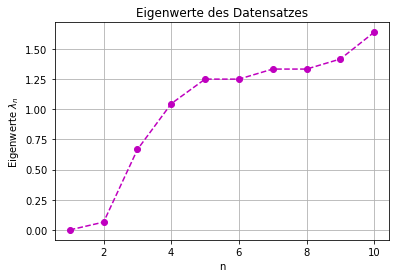

In [6]:


n = np.linspace(1, 100, 100 ) #natürliche Zahlen von 1 bis 100 (benötigen wir für die Plots)

plt.title('Eigenwerte des Datensatzes')
plt.xlabel('n')
plt.ylabel('Eigenwerte $\lambda_n$')

plt.plot(n[:n_1], Werte_1[:n_1],'m--o')
plt.grid()
plt.show()


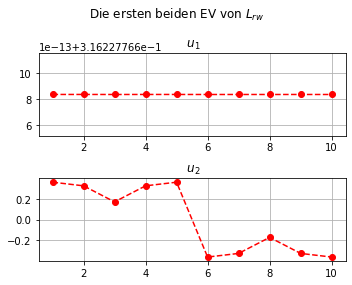

In [7]:
#Plotte Einträge der ersten 2 Eigenvektoren
fig, ax = plt.subplots(2)
fig.suptitle('Die ersten beiden EV von $L_{rw}$')


ax[0].plot(n[:n_1],Vek_1[:,0], 'r--o')
ax[0].grid()
ax[0].set_title(' $u_1 $')
ax[1].ticklabel_format(useOffset=False, style='plain')

ax[1].plot(n[:n_1],Vek_1[:,1], 'r--o')
ax[1].grid()
ax[1].set_title(' $u_2$ ')
ax[1].ticklabel_format(useOffset=False, style='plain')

fig.set_size_inches(5,4)
fig.tight_layout()

Man sieht, dass der erste Eigenvektor der konstante Vektor ist. Aus diesem erhalten wir also keine Informationen über den Graphen. Wenn wir den zweiten Eigenvektor betrachten, sehen wir, dass die Einträge für $v_1,...,v_5$ größer null und die Einträge für $v_6,...,v_{10}$  kleiner null sind. Wenn wir unseren Graphen nun so aufteilen, dass wir in einem Cluster alle Knoten mit postivem Eintrag in $u_2$ und im anderen alle mit negativen Eintrag nähmen, wäre dies genau die intuitive Aufteilung, die wir erhielten, wenn wir den Graph zwischen Knoten $v_3$ und $v_8$ schneiden würden. 


Im Folgenden verändern wir unseren Graphen etwas, indem wir eine Komponente (Haus des Nikolaus) hinzufügen. Dazu nehmen wir die Vereinigung des alten Graphen mit einem Haus des Nikolaus und fügen manuell eine Kanten hinzu.

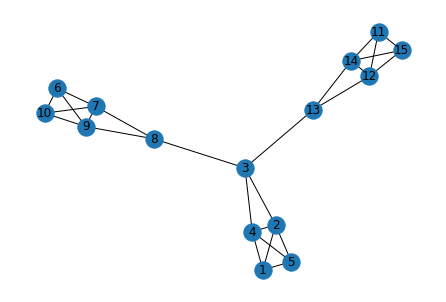

In [8]:
G_2 = nx.Graph()


#Knotenmenge
V_2 = np.array([11,12,13,14,15]) 
G_2.add_nodes_from(V_2)

#Kantenmenge
E_2 = [(11,12),(14,13),(13,12),(12,15),(15,11), (12,14),(14,15), (11,14)] #
G_2.add_edges_from(E_2)

#G_2 entspricht nun einem "Haus des Nikolaus"


#Vereinigung von G_1 und G_2
U = nx.union(G_1, G_2  )

#Füge manuell eine Kante hinzu
U.add_edges_from([(13, 3) ])


#Damit wir U jedes mal gleich zeichnen, legen wir auch hier die Position für jeden Knoten fest 
pos_U = nx.spring_layout(U, seed=4) 

nx.draw(U, pos = pos_U, with_labels = True )

Nun berechnen wir wieder die normalisierte Laplace-Matrix $L_{rw}$ mit zuegörigen EV und plotten diese.

In [9]:
A = nx.to_numpy_array(U)

#Anzahl der Knoten für zweiten Graphen:
n_2 = A.shape[0]

#Gradmatrix D
D = np.diag(A.sum(axis=1)) 

#nxn Identitätsmatrix 
Id = np.identity(D.shape[0])

#normalisierte Laplace-Matrix
L_rw = Id - np.matmul(np.linalg.inv(D), A) #Id - Matrixmultiplikation D^{-1} * A


#Eigenwerte mit Eigenvektoren
Werte_2, Vek_2 = np.linalg.eig(L_rw)


#aufsteigende Sortierung nach den Eigenwerten
Vek_2 = Vek_2[:,np.argsort(Werte_2)]
Werte_2 = Werte_2[np.argsort(Werte_2)]


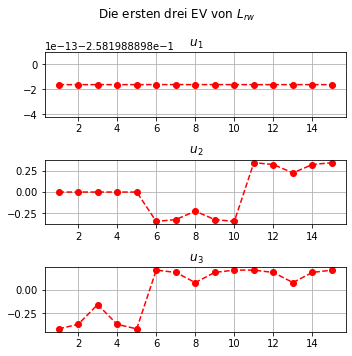

In [10]:
from matplotlib import pyplot as plt

n = np.linspace(1, 100, 100 )


#Plotte Einträge der ersten 3 Eigenvektoren
fig, ax = plt.subplots(3)
fig.suptitle('Die ersten drei EV von $L_{rw}$')


ax[0].plot(n[:n_2],Vek_2[:,0], 'r--o')
ax[0].grid()
ax[0].set_title(' $u_1 $')



ax[1].plot(n[:n_2],Vek_2[:,1], 'r--o')
ax[1].grid()
ax[1].set_title(' $u_2$ ')
ax[1].ticklabel_format(useOffset=False, style='plain')

ax[2].plot(n[:n_2],Vek_2[:,2], 'r--o')
ax[2].grid()
ax[2].set_title(' $u_3$ ')
ax[2].ticklabel_format(useOffset=False, style='plain')

fig.set_size_inches(5,5)
fig.tight_layout()

Der erste Eigenvektor $u_1$ ist wieder konstant. Beim $u_2$ sieht man, dass die Einträge für Knoten $v_6, ..., v_{10}$ negativ sind, für Knoten $v_{11}, ..., v_{15}$ gleichermaßen positiv und für Knoten $v_1, ..., v_5$ konstant null sind. Insbesondere könnnen wir hiermit Knoten $v_6, ..., v_{10}$ von den Knoten $v_{11}, ..., v_{15}$ abtrennen. Für $u_3$ sehen wir, dass die Einträge für $v_1, ..., v_5$ kleiner null und für Knoten $v_6, ..., v_{15}$ größer null sind. Insbesondere können wir damit die ersten 5 Knoten von den restlichen abgrenzen. Wir erhalten also durch Blick auf die Eigenvektoren die Intuive Aufteilung 
$A_1 = \{ v_1, ..., v_5 \}, \: A_2 = \{ v_6, ..., v_{10} \}, \: A_3 = \{ v_{11}, ..., v_{15} \}.$

Nun wollen wir die Grafiken noch in kompakter Weise plotten, um diese in der Arbeit zu verwenden. Die zweite Grafik, die wir erzeugen entspricht Abbildung 2 aus der Arbeit.

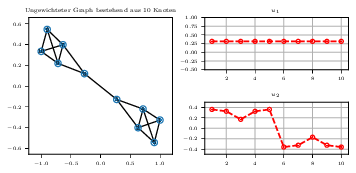

In [11]:
#Plots für Graphen 1:

matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})


fig_1 =plt.figure(figsize=(15, 5))


ax= plt.subplot(1,2,1)
nx.draw(G_1,pos = pos_G, with_labels = True, node_size =  40,  ax= ax, font_size= 6)
ax.set_axis_on()
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True, labelsize= 8)
ax.set_title(' Ungewichteter Graph bestehend aus 10 Knoten',  fontsize=6)
ax.tick_params( labelsize= 4)

ax = plt.subplot(2,2,2)
ax.plot(n[:n_1],Vek_1[:,0], 'r--o', markersize=4)
ax.grid()
ax.set_title(' $u_1$ ',   fontsize=6)
ax.tick_params( labelsize= 4)
ax.set_xlim([0.5, 10.5])
ax.set_ylim([-0.5, 1])

ax = plt.subplot(2,2,4)
ax.plot(n[:n_1],Vek_1[:,1], 'r--o', markersize=4)
ax.grid()
ax.set_title(' $u_2$ ',  fontsize=6)
ax.tick_params( labelsize= 4)
ax.set_xlim([0.5, 10.5])
ax.set_ylim([-0.5, 0.5])

fig_1.tight_layout()


fig_1.set_size_inches(5.04,2.5)


fig_1.tight_layout() #Für korrekte Abstände zwischen den Teilplots

plt.savefig('Graphbeispiel_1.pgf')

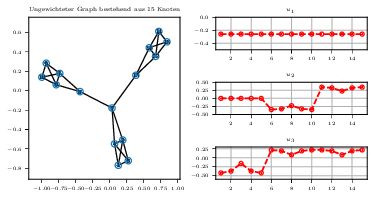

In [12]:
#Plots für Graphen 2:

matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})


fig_2 =plt.figure(figsize=(15, 7))




ax= plt.subplot(1,2,1)
nx.draw(U,pos = pos_U, with_labels = True, node_size =  40,  ax= ax, font_size= 6)
ax.set_axis_on()
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True, labelsize= 8)
ax.set_title(' Ungewichteter Graph bestehend aus 15 Knoten',  fontsize=6)
ax.tick_params( labelsize= 4)



ax = plt.subplot(3,2,2)
ax.plot(n[:n_2],Vek_2[:,0], 'r--o', markersize=4)
ax.grid()
ax.set_title(' $u_1$ ',   fontsize=6)
ax.tick_params( labelsize= 4)
ax.set_xlim([0.5, 15.5])
ax.set_ylim([-0.5, 0])


ax = plt.subplot(3,2,4)
ax.plot(n[:n_2],Vek_2[:,1], 'r--o', markersize=4)
ax.grid()
ax.set_title(' $u_2$ ',   fontsize=6)
ax.tick_params( labelsize= 4)
ax.set_xlim([0.5, 15.5])
ax.set_ylim([-0.5, 0.5])


ax= plt.subplot(3,2,6)
ax.plot(n[:n_2],Vek_2[:,2], 'r--o', markersize=4)
ax.grid()
ax.set_title(' $u_3$ ',   fontsize=6)
ax.tick_params( labelsize= 4)
ax.set_xlim([0.5, 15.5])
ax.set_ylim([-0.6, 0.3])



fig_2.tight_layout()


fig_2.set_size_inches(5.3,2.85)


fig_2.tight_layout() #Für korrekte Abstände zwischen den Teilplots

plt.savefig('Graphbeispiel_2.pgf')